In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
# names = [TRACK, DATE, GRADE, DISTANCE, 
# A_5D, A_5T, A_5G, A_5PL, A_5PG, A_5B, 
# A_10D, A_10T, A_10G, A_10PL, A_10PG, A_10B, 
# A_15D, A_15T, A_15G, A_15PL, A_15PG, A_15B, 
# A_LDR, A_PLACE, A_TRAP, 
# B_5D, B_5T, B_5G, B_5PL, B_5PG, B_5B, 
# B_10D, B_10T, B_10G, B_10PL, B_10PG, B_10B, 
# B_15D, B_15T, B_15G, B_15PL, B_15PG, B_15B, 
# B_LDR, B_PLBCE, B_TRBP]

In [4]:
features = [
"5D",   "5T",  "5G",  "5PL",  "5PG",  "5B", 
"10D", "10T", "10G", "10PL", "10PG", "10B", 
"15D", "15T", "15G", "15PL", "15PG", "15B"
]

In [26]:
df = pd.read_csv("../data/dataset.csv", index_col=False)

In [6]:
def normalize(s):
    if s[0] == 0 or s[0] == s[1]:
        return 0.0
    else:
        return s[0] / (s[0] + s[1])
    
def labeling(s):
    if int(s[0]) < int(s[1]):
        return "A"
    else:
        return "B"

In [25]:
df["RESULT"] = df[["A_PLACE", "B_PLACE"]].apply(labeling, axis=1)

In [11]:
df.head()

,TRACK,DATE,GRADE,DISTANCE,A_5D,A_5T,A_5G,A_5PL,A_5PG,A_5B,...,B_15D,B_15T,B_15G,B_15PL,B_15PG,B_15B,B_LDR,B_PLACE,B_TRAP,RESULT
0,Sunderland,2019-04-04 00:00:00,A3,450,1.0,0.6,0.6,0.8,0.2,2.4,...,1.00,0.00,0.33,0.40,0.60,3.22,4.0,2.0,4.0,A
1,Sunderland,2019-04-04 00:00:00,A3,450,1.0,0.6,0.6,0.8,0.2,2.4,...,1.00,0.00,0.33,0.40,0.60,3.22,4.0,3.0,1.0,A
2,Sunderland,2019-04-04 00:00:00,A3,450,1.0,0.6,0.6,0.8,0.2,2.4,...,1.00,0.40,0.07,0.47,0.53,3.77,7.0,4.0,3.0,A
3,Sunderland,2019-04-04 00:00:00,A3,450,1.0,0.6,0.6,0.8,0.2,2.4,...,0.93,0.80,0.20,0.67,0.33,3.08,4.0,5.0,6.0,A
4,Sunderland,2019-04-04 00:00:00,A3,450,1.0,0.6,0.6,0.8,0.2,2.4,...,0.33,0.27,0.00,0.27,0.07,1.85,8.0,6.0,5.0,A


In [33]:
#df = df[(df["DISTANCE"] == 450) & (df["TRACK"] == "Sunderland") & (df["GRADE"] == "A3")]
df1 = df[(df["DISTANCE"] == 450) & (df["TRACK"] == "Sunderland") & (df["GRADE"] == "A3")]
X = pd.DataFrame(columns=features)
for x_col in features:
    X[x_col] = df1[["A_"+x_col, "B_"+x_col]].apply(normalize, axis=1)

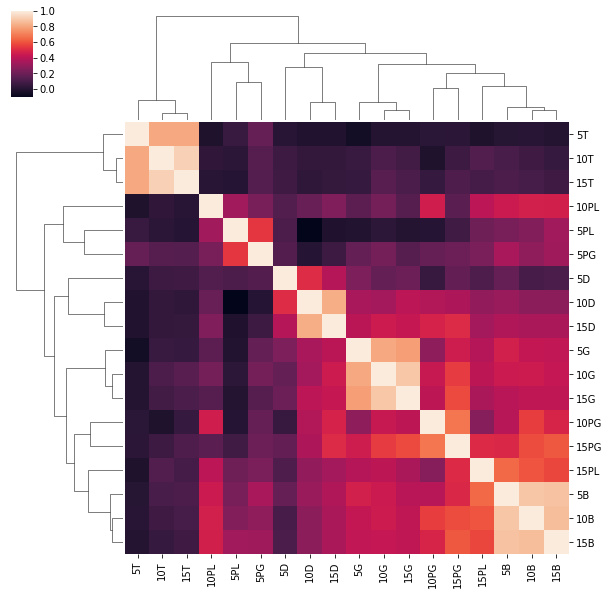

In [34]:
sns.clustermap(X.corr())

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, df["RESULT"], test_size=0.33, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
clf = RandomForestClassifier(n_estimators=100)

In [19]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
y_pred = clf.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.64      0.73      0.68        22
           B       0.76      0.68      0.72        28

    accuracy                           0.70        50
   macro avg       0.70      0.70      0.70        50
weighted avg       0.71      0.70      0.70        50

